## Importando bibliotecas

In [4]:
import pandas as pd
import nltk
import os
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
import matplotlib.pyplot as plt
import spacy
from collections import Counter

## Importando dados

In [6]:
review_train = pd.read_csv('./Arquivos/video_games_reviews_train.csv')
review_test = pd.read_csv('./Arquivos/video_games_reviews_test.csv')

review_train.head(4)
review_test.head(4)

,level_0,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,12154,25980,A16416X67B4ZKJ,B00005V6BB,"""mcfly70""","[1, 1]","MOH was good and all, but when you reach the c...",4,MOH: THE ACTUAL WAR WAS BETTER THE 3RD MCFLY R...,1035158400,"10 21, 2002"
1,7333,215010,A2Q2ADX9C9I5WZ,B00AZWE7ES,MCRC,"[0, 4]",I am so glad I only paid $15 for this game dur...,2,15 fps? really?,1399334400,"05 6, 2014"
2,6703,188851,A30IXQWBRD3GU9,B0053BCO00,Jerry,"[0, 0]",Forget this mario kart get mario kart ds or th...,3,ehhhh,1373414400,"07 10, 2013"
3,5649,93541,A1S7NYZF69KYAP,B000VRCNLG,Peanut Pedro,"[0, 1]",When I purchased this game from Amazon I certa...,1,Defective Disk/Great Seller,1348963200,"09 30, 2012"


# Pré-processamento

## - Letras minúsculas, pontuação e tokenização

In [7]:
review_preprocess = pd.DataFrame()

# Extraindo os dados que importam, reviews já em minúsculo
review_preprocess['Nota'] = review_train['overall']
review_preprocess['Review'] = review_train['reviewText'].str.lower() 

# Removendo pontuação e aplicando a tokenização
review_preprocess['Review'] = review_preprocess['Review'].apply(
    lambda x: ''.join([c for c in str(x) if c not in string.punctuation]))
review_preprocess['Tokenized review'] = review_preprocess.apply(
    lambda row: nltk.word_tokenize(str(row["Review"])), axis=1)

review_preprocess.head(4)

,Nota,Review,Tokenized review
0,1,ive got to play this on both consoles now and ...,"[ive, got, to, play, this, on, both, consoles,..."
1,2,this game gives you a series of word puzzles t...,"[this, game, gives, you, a, series, of, word, ..."
2,4,you should pretty much already know what this ...,"[you, should, pretty, much, already, know, wha..."
3,5,i really like this game i love all the challen...,"[i, really, like, this, game, i, love, all, th..."


## - Remoção de stopwords e stemização

In [8]:
stop_words = stopwords.words('english')

review_preprocess['Filtered review'] = review_preprocess['Tokenized review'].apply(
    lambda x: [str(item) for item in x if item not in stop_words])

review_preprocess['Stemmed review'] = review_preprocess['Filtered review'].apply(
    lambda x: [PorterStemmer().stem(item) for item in x])

review_preprocess.head(4)

,Nota,Review,Tokenized review,Filtered review,Stemmed review
0,1,ive got to play this on both consoles now and ...,"[ive, got, to, play, this, on, both, consoles,...","[ive, got, play, consoles, honestly, say, look...","[ive, got, play, consol, honestli, say, look, ..."
1,2,this game gives you a series of word puzzles t...,"[this, game, gives, you, a, series, of, word, ...","[game, gives, series, word, puzzles, figure, b...","[game, give, seri, word, puzzl, figur, bought,..."
2,4,you should pretty much already know what this ...,"[you, should, pretty, much, already, know, wha...","[pretty, much, already, know, game, youre, rea...","[pretti, much, alreadi, know, game, your, read..."
3,5,i really like this game i love all the challen...,"[i, really, like, this, game, i, love, all, th...","[really, like, game, love, challenges, love, d...","[realli, like, game, love, challeng, love, dif..."


# Análise de Corpus

## - Frequências de palavras e tamanho das reviews

In [9]:
review_analise = pd.DataFrame()

review_analise['Nota'] = review_train['overall']

# Extraindo o tamanho de cada análise
review_analise['Review Size'] = review_preprocess['Filtered review'].apply(
    lambda x: " ".join(x)).apply(len)

group_nota = review_preprocess.groupby('Nota')
words_freq = pd.DataFrame()

#Agrupando a frequência de cada palavra por nota
for i in range(1,6):
    aux = group_nota.apply(lambda x:x[x['Nota'] == i]['Stemmed review'].apply(
        lambda x: " ".join(x)).str.split(expand=True).stack().value_counts()).reset_index(name='a')
    words_freq['Nota ' + str(aux['Nota'][0])] = aux['level_1'].astype(str) + ': ' + aux['a'].astype(str)

words_freq.head(50)

,Nota 1,Nota 2,Nota 3,Nota 4,Nota 5
0,game: 6204,game: 7441,game: 8031,game: 7903,game: 6329
1,play: 1817,play: 2192,play: 2310,play: 2272,play: 2006
2,like: 1367,like: 1951,like: 2185,like: 2063,like: 1405
3,get: 1336,get: 1755,get: 1964,get: 1848,one: 1266
4,one: 1176,one: 1387,one: 1653,one: 1538,get: 1252
5,time: 1024,time: 1207,time: 1487,time: 1271,great: 918
6,even: 900,even: 946,realli: 1218,good: 1171,time: 908
7,dont: 876,realli: 889,good: 1126,use: 1114,use: 816
8,would: 784,make: 881,use: 999,fun: 1080,fun: 781
9,make: 784,dont: 880,make: 999,realli: 1054,realli: 719


É interessante notar que palavras "positivas" aparecem relativamente na mesma frequência em cada uma das nota. A palavra _bad_, por exemplo, só aparece duas vezes no top 50 palavras de todas as notas, o que provavelmente ocorre porque a maioria dos usuários usa a negação de uma palavra positiva, como "_didn't have fun_" ou "_not good_". Porém, ainda assim podemos notar algumas diferenças:

    1. Como dito anteriormente, os usuários insatisfeitos usam significativamente mais a negação das palavras.
    2. Tanto os usuários que atribuíram nota 1 quanto os que atribuíram 5 concentram mais as palavras, provavelmente porque são mais diretos.
    3. Os que menos gostaram do produto citam mais o dinheiro e a compra do jogo, mostrando seu arrependimento.

### 1. Relação entre tamanho da review e nota

Para verificarmos uma relação entre o tamanho do review com a nota dada podemos plotar um gráfico do tamando médio que as reviews possuem para cada nota.

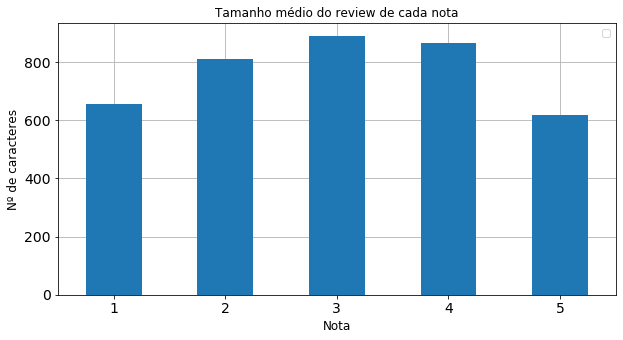

In [10]:
%matplotlib inline
plot_size = review_analise.groupby('Nota').mean(['Review Size']).plot(kind='bar', rot=0, zorder=3, figsize=(10,5))

plot_size.grid(zorder = -1)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
plot_size.legend([], fontsize = 11)
plot_size.set_title(f'Tamanho médio do review de cada nota', fontsize = 12)
plot_size.set_ylabel('Nº de caracteres', fontsize = 12)
plot_size.set_xlabel('Nota', fontsize = 12)
plt.show();

Podemos observar que as notas intermediárias tendem a possuir reviews maiores. Isso pode ser explicado pelo fato de que quando atribuímos uma nota mediana a algum produto, normalmente temos pontos positivos e negativos para citar, aumentando o tamanho da nossa análise. Este resultado reforça o ponto 2 citado na análise de frequências anteriormente.

# Featuring e Modelagem

### Instâncias e labels (Positivo ou negativo)

In [11]:
class Labels:
    def __init__(self, txt, rating):
        self.txt = txt
        self.rating = rating
        self.polar = self.getPolar()
        
    def getPolar(self):
        if self.rating <= 3:
            return "NEGATIVO"
        else: #Nota 4 ou 5
            return "POSITIVO"

### Objetos de treino e teste

In [12]:
objects_train = []
objects_test = []
for index, row in review_preprocess.iterrows():
    objects_train.append(Labels(row['Review'], row['Nota']))
for index, row in review_test.iterrows():
    objects_test.append(Labels(row['reviewText'], row['overall']))

## BagOfWords e Tfidf

### - Vetorização

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

BOWvectorizer = CountVectorizer()
TFIDFvectorizer = TfidfVectorizer()

BOWtrain_vec = BOWvectorizer.fit_transform(review_preprocess['Review'])
BOWtest_vec = BOWvectorizer.transform([str(x.txt) for x in objects_test])

TFIDFtrain_vec = TFIDFvectorizer.fit_transform(review_preprocess['Review'])
TFIDFtest_vec = TFIDFvectorizer.transform([str(x.txt) for x in objects_test])

print(BOWtrain_vec[0])
print(TFIDFtrain_vec[0])

  (0, 29803)	1
  (0, 24538)	1
  (0, 55394)	1
  (0, 40857)	1
  (0, 54605)	1
  (0, 38018)	2
  (0, 8457)	1
  (0, 12646)	1
  (0, 37307)	1
  (0, 4440)	1
  (0, 9685)	1
  (0, 26984)	1
  (0, 47242)	1
  (0, 29465)	2
  (0, 32472)	1
  (0, 56)	1
  (0, 7469)	1
  (0, 54138)	2
  (0, 42863)	2
  (0, 33639)	1
  (0, 60919)	1
  (0, 38063)	1
  (0, 25959)	1
  (0, 29314)	1
  (0, 34155)	1
  (0, 57544)	1
  (0, 9289)	1
  (0, 30321)	1
  (0, 30629)	1
  (0, 30629)	0.22037284700485626
  (0, 30321)	0.087295183884133
  (0, 9289)	0.06767375726867406
  (0, 57544)	0.09841005599732885
  (0, 34155)	0.3018917564459885
  (0, 29314)	0.057664969168707184
  (0, 25959)	0.07440275615696836
  (0, 38063)	0.08963612935203706
  (0, 60919)	0.167154497843275
  (0, 33639)	0.17316963912149022
  (0, 42863)	0.4997556003977721
  (0, 54138)	0.10176496240931925
  (0, 7469)	0.11906456386418118
  (0, 56)	0.4400340298968873
  (0, 32472)	0.16708023093658284
  (0, 29465)	0.11580206290099682
  (0, 47242)	0.13448622946715863
  (0, 26984)	0.21792149

### - Modelagem com svm

In [15]:
from sklearn import svm

BOWclf_svm = svm.SVC(kernel='linear')
BOWclf_svm.fit(BOWtrain_vec, [x.polar for x in objects_train]);

TFIDFclf_svm = svm.SVC(kernel='linear')
TFIDFclf_svm.fit(TFIDFtrain_vec, [x.polar for x in objects_train]);

### - Modelagem com Gaussian Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

BOWclf_gnb = GaussianNB()
BOWclf_gnb.fit(BOWtrain_vec.toarray(), [x.polar for x in objects_train]);

TFIDFclf_gnb = GaussianNB()
TFIDFclf_gnb.fit(TFIDFtrain_vec.toarray(), [x.polar for x in objects_train]);

## Avaliando modelos

### - Medindo a qualidade do modelo

In [20]:
from sklearn.metrics import f1_score

def getscores(model, test_vec):
    f1scr = f1_score([x.polar for x in objects_test], model.predict(
        test_vec.toarray()), average = None, labels = ['POSITIVO', 'NEGATIVO'])
    scr = model.score(test_vec.toarray(), [x.polar for x in objects_test])
    return scr, f1scr

#BOWscore_svm, BOWf1score_svm = getscores(BOWclf_svm, BOWtest_vec)
TFIDFscore_svm, TFIDFf1score_svm = getscores(TFIDFclf_svm, TFIDFtest_vec)
BOWscore_gnb, BOWf1score_gnb = getscores(BOWclf_gnb, BOWtest_vec)
TFIDFscore_gnb, TFIDFf1score_gnb = getscores(TFIDFclf_gnb, TFIDFtest_vec)


### - Visualizando

In [21]:
scoreDF = pd.DataFrame()

scoreDF['Modelo'] = ['BOW SVM', 'BOW Gaussian Naive Bayes', 'TFIDF SVM', 'TFIDF Gaussian Naive Bayes']
scoreDF['Acurácia'] = [BOWscore_svm, BOWscore_gnb, TFIDFscore_svm, TFIDFscore_gnb]
scoreDF['F1 Score p/ positivos'] = [BOWf1score_svm[0], BOWf1score_gnb[0], TFIDFf1score_svm[0], TFIDFf1score_gnb[0]]
scoreDF['F1 Score p/ negativos'] = [BOWf1score_svm[1], BOWf1score_gnb[1], TFIDFf1score_svm[1], TFIDFf1score_gnb[1]]

scoreDF

,Modelo,Acurácia,F1 Score p/ positivos,F1 Score p/ negativos
0,BOW SVM,0.7496,0.705550,0.782185
1,BOW Gaussian Naive Bayes,0.5680,0.520426,0.606987
2,TFIDF SVM,0.8032,0.751264,0.837194
3,TFIDF Gaussian Naive Bayes,0.5788,0.518519,0.625667


### - Otimização de hiperparêmtros

É importante citar que não haverá a otimização dos modelos GNB devido à sua baixa acurácia para ambas features. Contudo, ambas as otimizações dos hiperparâmetros dos modelos SVM são realizadas.

#### 1. BagOfWords e SVM

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

SVMparameters = {'kernel': ('linear', 'rbf'), 'C': (1,2,3)}

svc = svm.SVC()

BOWclf_svm_opt = GridSearchCV(svc, SVMparameters, cv = 5)
BOWclf_svm_opt.fit(BOWtrain_vec, [x.polar for x in objects_train])

BOWclf_svm_opt.best_params_

{'C': 3, 'kernel': 'rbf'}

#### 2. TFIDF e SVM

In [45]:
TFIDFclf_svm_opt = GridSearchCV(svc, SVMparameters, cv = 5)
TFIDFclf_svm_opt.fit(TFIDFtrain_vec, [x.polar for x in objects_train])

TFIDFclf_svm_opt.best_params_

{'C': 1, 'kernel': 'linear'}

#### Resultados otimizados

In [22]:
from sklearn.metrics import f1_score

BOWf1score_svm_opt = getscores(BOWclf_svm_opt, BOWtest_vec)[1]

TFIDFf1score_svm_opt = getscores(TFIDFclf_svm_opt, TFIDFtest_vec)[1]

In [23]:
score_optDF = pd.DataFrame()

score_optDF['Modelo'] = ['BOW SVM OPT', 'TFIDF SVM OPT']
score_optDF['Acurácia'] = [BOWclf_svm_opt.best_score_, TFIDFclf_svm_opt.best_score_]
score_optDF['F1 Score p/ positivos'] = [BOWf1score_svm_opt[0], TFIDFf1score_svm_opt[0]]
score_optDF['F1 Score p/ negativos'] = [BOWf1score_svm_opt[1], TFIDFf1score_svm_opt[1]]

scoreDF.append(score_optDF, ignore_index = True)

,Modelo,Acurácia,F1 Score p/ positivos,F1 Score p/ negativos
0,BOW SVM,0.749600,0.705550,0.782185
1,BOW Gaussian Naive Bayes,0.568000,0.520426,0.606987
2,TFIDF SVM,0.803200,0.751264,0.837194
3,TFIDF Gaussian Naive Bayes,0.578800,0.518519,0.625667
4,BOW SVM OPT,0.764000,0.687225,0.821608
5,TFIDF SVM OPT,0.798875,0.751264,0.837194


A otimização realmente causou uma melhora no modelo SVM com uso do bag of words já que foram encontrados melhores hiperparâmetros, mas ainda não a ponto de ser tão preciso quanto quando utilizamos o TFIDF que, por sua vez, manteve os mesmos hiperparâmetros de antes da otimização, chegando a ocorrer uma pequena queda por motivos aleatórios.

Apesar de toda a otimização, existem alguns problemas no modelo em pontos que foram mostrados na análise do corpus, como por exemplo o uso de palavras relacionadas à compra do jogo, que tendem a fazer nosso modelo prever um resultado negativo errôneamente algumas vezes:

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

print(TFIDFclf_svm_opt.predict(TFIDFvectorizer.transform(['Nice game, you should buy it'])))

print(TFIDFclf_svm_opt.predict(TFIDFvectorizer.transform(['Nice game, you should test it'])))

['NEGATIVO']
['POSITIVO']


Por mais que a maioria das palavras tenham um caráter positivo, apenas a palavra _buy_ foi suficiente para o modelo realizar uma predição errônea.

# Salvando modelo

In [ ]:
import pickle

with open('./Modelos/Sentiment_SVMclf_bow', 'wb') as f:
    pickle.dump(BOWclf_svm, f)
with open('./Modelos/Sentiment_SVMclf_tfidf', 'wb') as f:
    pickle.dump(TFIDFclf_svm, f)
with open('./Modelos/Sentiment_SVMclf_bowOPT', 'wb') as f:
    pickle.dump(BOWclf_svm_opt, f)
with open('./Modelos/Sentiment_SVMclf_tfidfOPT', 'wb') as f:
    pickle.dump(TFIDFclf_svm_opt, f)
with open('./Modelos/Sentiment_GNBclf_bow', 'wb') as f:
    pickle.dump(BOWclf_gnb, f)
with open('./Modelos/Sentiment_GNBclf_tfidf', 'wb') as f:
    pickle.dump(TFIDFclf_gnb, f)


In [ ]:
import pickle

#with open('./Modelos/Sentiment_SVMclf_bow', 'rb') as f:
    #BOWclf_svm = pickle.load(f)
with open('./Modelos/Sentiment_SVMclf_tfidf', 'rb') as f:
    TFIDFclf_svm = pickle.load(f)
with open('./Modelos/Sentiment_SVMclf_bowOPT', 'rb') as f:
    BOWclf_svm_opt = pickle.load(f)
with open('./Modelos/Sentiment_SVMclf_tfidfOPT', 'rb') as f:
    TFIDFclf_svm_opt = pickle.load(f)
with open('./Modelos/Sentiment_GNBclf_bow', 'rb') as f:
    BOWclf_gnb = pickle.load(f)
with open('./Modelos/Sentiment_GNBclf_tfidf', 'rb') as f:
    TFIDFclf_gnb = pickle.load(f)